# Referencias

* Matplotlib manejo básico de imágenes https://matplotlib.org/3.2.1/tutorials/introductory/images.html
* Scipy procesamiento de imágenes  https://scipy-lectures.org/advanced/image_processing/
* Filtrado de imágenes con fft2 http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html
* Búsqueda de un patrón dentro de una imágen http://www.dspguide.com/ch24/7.htm por convolución en el espacio de Fourier (libro disponible en PDF gratuito en la página)
* Eliminando un patrón de una imágen en Fotografía https://photography-on-the.net/forum/showthread.php?t=1223867


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import matplotlib.image as mpimg
import matplotlib.colors as mpcol

In [2]:
N = 10 

x_min = -3
x_max = 3
y_min = -3
y_max = 3
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)

In [3]:
X, Y = np.meshgrid(x, y)

In [4]:
image = Y 

In [5]:
image

array([[-3.        , -3.        , -3.        , -3.        , -3.        ,
        -3.        , -3.        , -3.        , -3.        , -3.        ],
       [-2.33333333, -2.33333333, -2.33333333, -2.33333333, -2.33333333,
        -2.33333333, -2.33333333, -2.33333333, -2.33333333, -2.33333333],
       [-1.66666667, -1.66666667, -1.66666667, -1.66666667, -1.66666667,
        -1.66666667, -1.66666667, -1.66666667, -1.66666667, -1.66666667],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        

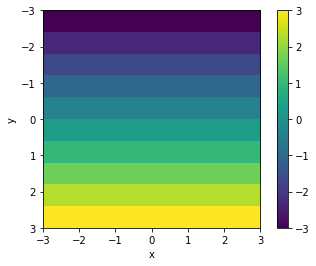

In [6]:
plt.imshow(image, extent=[x_min,x_max, y_max,y_min])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

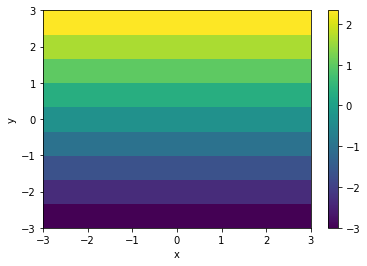

In [7]:
plt.pcolor(x, y, image)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

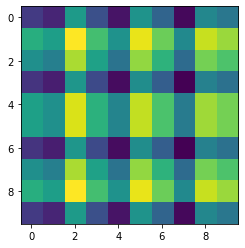

In [8]:
image = np.sin(3*X) + np.cos(3*Y)

plt.imshow(image)

In [9]:
N = 100 

x_min = -3
x_max = 3
y_min = -3
y_max = 3
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X,Y = np.meshgrid(x,y)

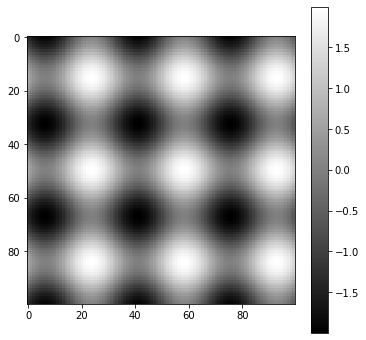

In [10]:
image = np.sin(3*X) + np.cos(3*Y)

fig = plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.colorbar()

4996.635495905622


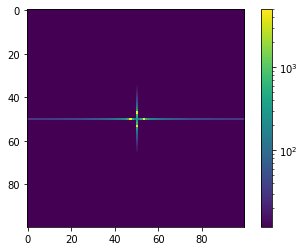

In [28]:
image_fft = fftpack.fft2(image)

im_fft_shift = fftpack.fftshift(image_fft)

print(np.max(np.abs(im_fft_shift)))

plt.imshow(np.abs(im_fft_shift), norm=mpcol.LogNorm())
plt.colorbar()
plt.clim(12, 5000)

In [29]:
def rot( x, y, alpha):
    matrix = np.array([[ np.cos(alpha), np.sin(alpha)],
                       [-np.sin(alpha), np.cos(alpha)]])
    new_v = np.array([x,y]).dot(matrix)
    
    return new_v

In [42]:
image = np.zeros((N,N))
alpha = 3*np.pi/4

for i in range(N):
    for j in range(N):
        u, v = rot(x[i], y[j], alpha)
        #u, v = x[i], y[j]
        image[i][j] = np.cos( 20 * u)  * np.cos( 9 * v) + 0

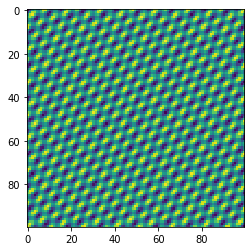

In [43]:
plt.imshow(image)

In [44]:
def show_fft( image ):
    F = fftpack.fft2(image)
    F = np.abs(F)

    fourier = fftpack.fftshift(F)

    plt.figure(figsize=(8,8))
    plt.imshow(fourier, norm=mpcol.LogNorm())
    plt.colorbar()

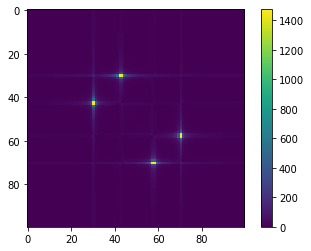

In [46]:
F = fftpack.fft2(image)
F = np.abs(F)

fourier = fftpack.fftshift(F)

plt.imshow(fourier) #, norm=mpcol.LogNorm())
plt.colorbar()
#plt.clim(0.01, 10000)

In [47]:
!wget http://scipy-lectures.org/_downloads/moonlanding.png

--2020-04-28 14:44:26--  http://scipy-lectures.org/_downloads/moonlanding.png
Resolving scipy-lectures.org (scipy-lectures.org)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to scipy-lectures.org (scipy-lectures.org)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216481 (211K) [image/png]
Saving to: ‘moonlanding.png.1’

moonlanding.png.1   100%[===================>] 211,41K   331KB/s    in 0,6s    

2020-04-28 14:44:27 (331 KB/s) - ‘moonlanding.png.1’ saved [216481/216481]



In [48]:
!ls

 7034279-car-street-city-photo.jpg	       severla_000.wav
 Brick-wallaper-For-Background-7.jpg	       severla_8000.wav
 brown-brick-wall-wallpaper-png-clip-art.png   severla.aup
'fft audio con scipy.wavfile-Copy1.ipynb'      severla_data
'fft audio con scipy.wavfile.ipynb'	       severla.wav
'fft resumen clase.ipynb'		       test.dat
 hw06_apellidos_apellidos.ipynb		       test_sin_1320.wav
 HW06_solved.ipynb			       test_sin_440_mixed.wav
 mensaje_alderecho.wav			       test_sin_440.wav
 mensaje.wav				       test.wav
 moonlanding.png			       Untitled1.ipynb
 moonlanding.png.1			       Untitled.ipynb
 pattern.png


In [91]:
im = mpimg.imread("moonlanding.png")
# http://scipy-lectures.org/_downloads/moonlanding.png

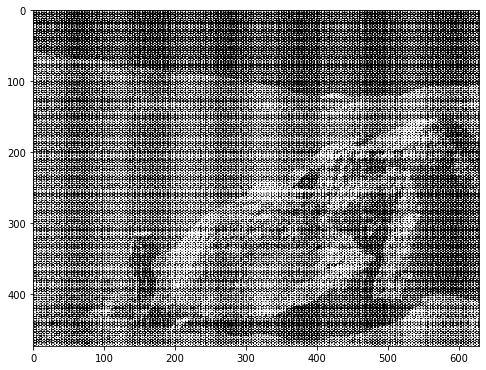

In [50]:
plt.figure(figsize=(8,8))
plt.imshow(im, cmap="gray")

Text(0.5, 1.0, 'Fourier transform')

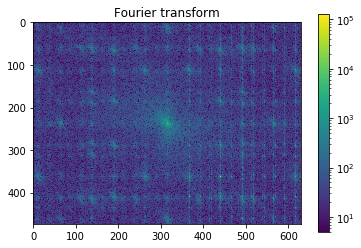

In [66]:
im_fft = fftpack.fft2(im)
im_fft_shift = fftpack.fftshift(im_fft)
# Show the results

def plot_spectrum(im_fft):
    im_fft_shift = fftpack.fftshift(im_fft)
    plt.imshow(np.abs(im_fft_shift), norm=mpcol.LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

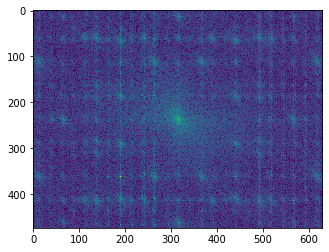

In [68]:
plt.imshow(np.abs(im_fft_shift), norm=mpcol.LogNorm(vmin=5))

In [69]:
filtered_fft = np.copy(im_fft_shift)

In [73]:
filtered_fft[:200, :] = 0
filtered_fft[-200:, :] = 0
filtered_fft[:, :200] = 0
filtered_fft[:, -200:] = 0


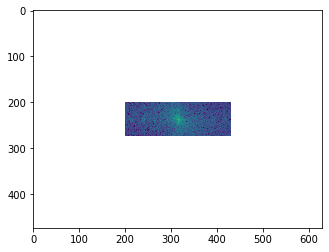

In [74]:
plt.imshow(np.abs(filtered_fft), norm=mpcol.LogNorm(vmin=5))

In [75]:
fft_filtered = fftpack.ifftshift(filtered_fft)

In [77]:
im_filtered = fftpack.ifft2(fft_filtered)

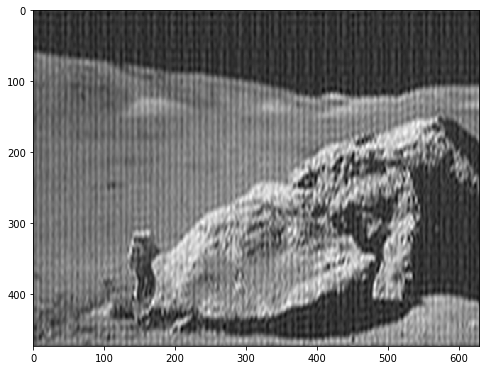

In [81]:
plt.figure(figsize=(8,8))
plt.imshow(np.abs(im_filtered), cmap="gray")

In [82]:
image = mpimg.imread("7034279-car-street-city-photo.jpg")
# http://7-themes.com/data_images/out/77/7034279-car-street-city-photo.jpg

In [83]:
image = image/255.

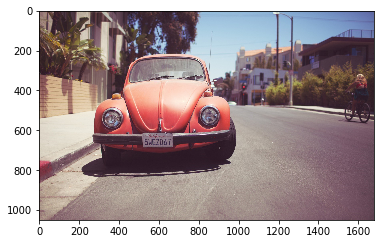

In [84]:
plt.imshow(image)

In [85]:
F_image = fftpack.fft2(image)

In [86]:
np.abs(F_image).max()

3147.7333333333336

In [87]:
F_image.shape

(1050, 1680, 3)

In [89]:
F = fftpack.fftshift(F_image)

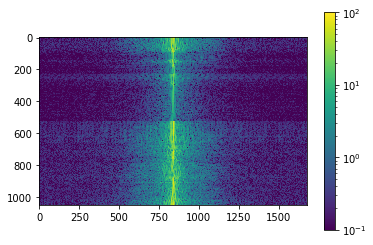

In [90]:
plt.imshow(np.abs(F[:,:,0]), norm=mpcol.LogNorm())
plt.colorbar()
plt.clim(0.1,100)

In [210]:
x_c = 1050/2
y_c = 1680/2

In [211]:
def window(I, x, y, x_c, y_c, size):
    dist = ( (x - x_c)**2 + (y - y_c)**2)**0.5
    if dist < size:
        return I
    else:
        return 0

In [212]:
Filtered = np.copy(F)

In [213]:
for i in range(1050):
    for j in range(1680):
        for k in range(3):
            I = Filtered[i,j,k]
            Filtered[i,j,k] = window(I, i, j, x_c, y_c, 20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


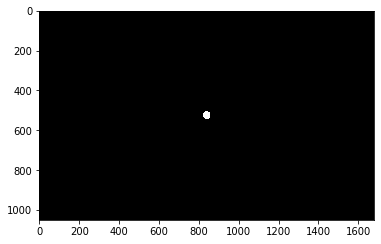

In [214]:
plt.imshow(np.abs(Filtered), norm=mpcol.LogNorm())